In [9]:
# Import Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('Customer-Churn-Records.csv')

In [15]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [17]:
#drop 'RowNumber', 'CustomerId', 'Surname' as they are irrelevant to churn outcome

df.drop(['RowNumber', 'CustomerId', 'Surname'], axis= 'columns', inplace=True,errors = 'ignore')
df.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [19]:
df=df.drop(['Satisfaction Score','Card Type','Point Earned','Complain'],axis =1)

In [21]:
catgorical_columns=df.select_dtypes(include=['object']).columns
catgorical_columns

Index(['Geography', 'Gender'], dtype='object')

In [23]:
lb=LabelEncoder()
for col in catgorical_columns:
    df[col]=lb.fit_transform(df[col])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [25]:
X =df.drop(columns=['Exited'])  
y=df['Exited']

In [27]:
from imblearn.over_sampling import SMOTE
resampler = SMOTE()
X,y = resampler.fit_resample(X,y)

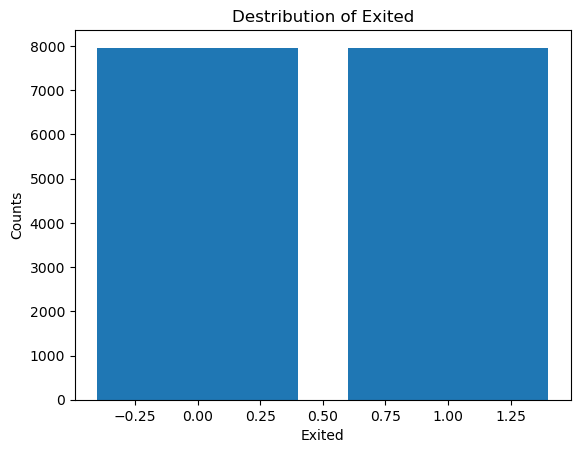

In [28]:
counts=y.value_counts()
plt.bar(counts.index,counts.values)
plt.title('Destribution of Exited')
plt.xlabel('Exited')
plt.ylabel('Counts')
plt.show()

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [33]:
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [35]:
def evaluate_model(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    cm = confusion_matrix(y_test, y_pred)
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.show()

In [37]:
LR= LogisticRegression()

# Train the model
LR.fit(X_train, y_train)

# Make predictions
y_pred_LR = LR.predict(X_test)

Accuracy: 0.6828885400313972
Precision: 0.6639549436795995
Recall: 0.6916558018252934
ROC AUC: 0.6831991910398424


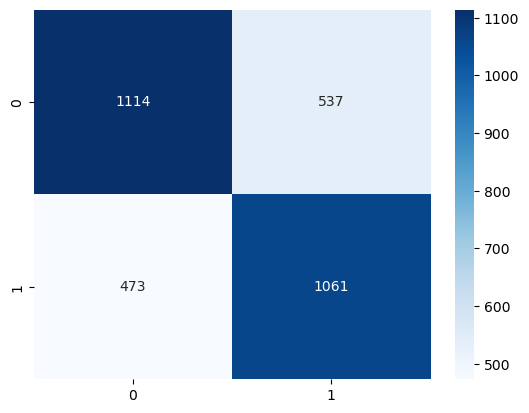

In [39]:
evaluate_model(y_test,y_pred_LR)

In [41]:
dt = DecisionTreeClassifier(criterion= "gini",max_depth = 5,random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

Accuracy: 0.8003139717425432
Precision: 0.782035175879397
Recall: 0.8116036505867015
ROC AUC: 0.8007139997330842


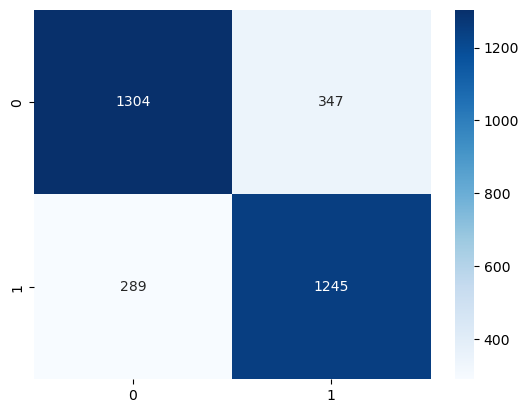

In [43]:
#Evaluate the model
evaluate_model(y_test,y_pred_dt)

In [45]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
RF.fit(X_train, y_train)

# Make predictions
y_pred_rf = RF.predict(X_test)

Accuracy: 0.8577708006279435
Precision: 0.8376014990630856
Recall: 0.8741851368970013
ROC AUC: 0.8583524109681857


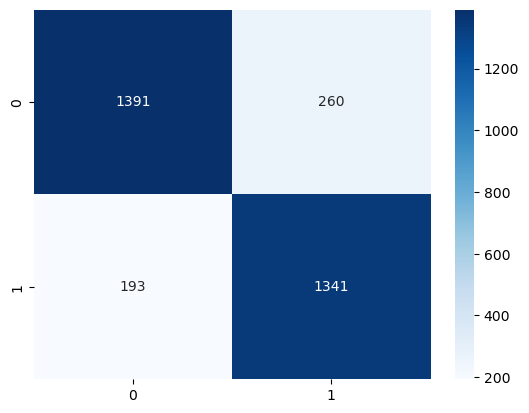

In [46]:
evaluate_model(y_test,y_pred_rf)

In [47]:
# Logistic Regression ROC Curve
y_pred_proba_log = LR.predict_proba(X_test_scaled)[:,1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
roc_auc_log = roc_auc_score(y_test, y_pred_proba_log)

In [48]:
# Random Forest ROC Curve
y_pred_proba_rf = RF.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

In [53]:
# Decision Tree ROC Curve
y_pred_proba_dt = dt.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

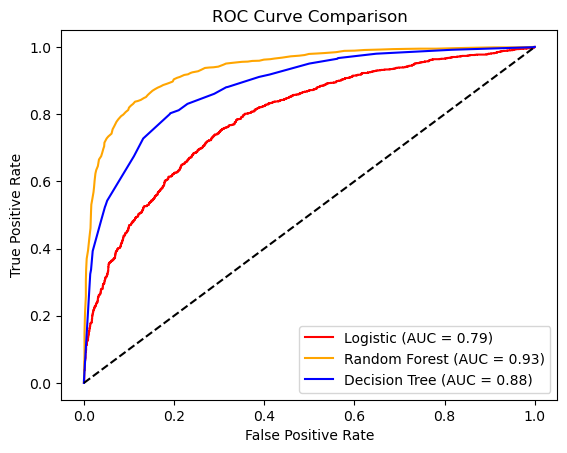

In [55]:
# Plotting ROC Curves
plt.plot(fpr_log, tpr_log, label=f"Logistic (AUC = {roc_auc_log:.2f})", color="red")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color="orange")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--')  # Black dashed line for reference
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [57]:
# Churn Prediction Function
def predict_exited(model, scaler, input_data):
    
    # Convert the input data to a numpy array
    input_data = np.array(input_data).reshape(1, -1)
    
    input_data_scaled = scaler.transform(input_data)
    
    prediction = model.predict(input_data_scaled)
    
    # Output
    if prediction == 1:
        return "The customer is likely to churn."
    else:
        return "The customer is unlikely to churn."

In [59]:
# Input values
input_data = [600, 1, 0, 40, 5, 60000, 2, 1, 1, 50000]  

#Logistic Regression model
model_1 = LR

## model_1 Result
result = predict_exited(model_1, scaler, input_data)
print(result)

The customer is unlikely to churn.


In [61]:
# Input values
input_data = [600, 1, 0, 40, 5, 60000, 2, 1, 1, 50000]  

#Decision Tree model
model_2 = dt

## model_1 Result
result = predict_exited(model_2, scaler, input_data)
print(result)

The customer is unlikely to churn.


In [63]:
# Input values
input_data = [600, 1, 0, 40, 5, 60000, 2, 1, 1, 50000]  

#Random Forest  model
model_3 = RF

## model_1 Result
result = predict_exited(model_3, scaler, input_data)
print(result)

The customer is unlikely to churn.


In [65]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


# GridSearchCV 

## **Random Forest Classifier**

In [69]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees
    "max_depth": [10, 20, None],     # Tree depth
    "min_samples_split": [2, 5, 10], # Min samples to split
    "min_samples_leaf": [1, 2, 4],   # Min samples per leaf
    "criterion": ["gini", "entropy"] # Splitting criterion
}

In [71]:
# Initialize model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [72]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.8578378601599198


In [77]:

# Convert results into DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Select relevant columns and sort by mean test score
results_df = results_df[['param_criterion', 'param_n_estimators', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'mean_test_score']]
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

print(results_df.head(10))  # Show top 10 results


    param_criterion  param_n_estimators param_max_depth  \
56             gini                 200            None   
29             gini                 200              20   
55             gini                 100            None   
28             gini                 100              20   
54             gini                  50            None   
137         entropy                 200            None   
136         entropy                 100            None   
27             gini                  50              20   
58             gini                 100            None   
109         entropy                 100              20   

     param_min_samples_leaf  param_min_samples_split  mean_test_score  
56                        1                        2         0.857838  
29                        1                        2         0.857445  
55                        1                        2         0.856739  
28                        1                        2         0

**Grid search for n_estimators, max_depth Hyperparameters**

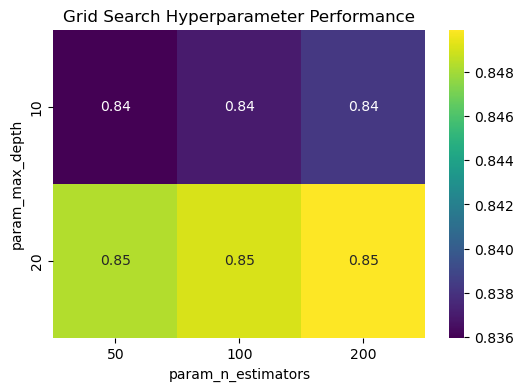

In [100]:
# Grid search for n_estimators, max_depth Hyperparameters

pivot_table = results_df.pivot_table(
    index='param_max_depth',
    columns='param_n_estimators',
    values='mean_test_score',
    aggfunc='mean') #This will compute the mean of mean_test_score for duplicates.

plt.figure(figsize=(6, 4))
sns.heatmap(pivot_table, annot=True, cmap="viridis")
plt.title("Grid Search Hyperparameter Performance")
plt.show()


# Insights from the Grid Search
- Increasing max_depth from 10 to 20 improves performance.

- Increasing n_estimators doesn’t significantly change performance beyond a certain point (50 vs. 100 vs. 200).

- Best Parameters (from this heatmap): max_depth = 20, n_estimators = 200 (or even 100 since performance is similar).


**Next Steps**

- If the difference is small, choosing a smaller n_estimators (e.g., 100 instead of 200) may reduce training time.

- Check overfitting: If max_depth = 20 is too deep, it may overfit. Testing on a separate test set is necessary.

In [82]:
mean_score = results_df['mean_test_score'].mean()
print(f"Overall Mean Test Score: {mean_score:.4f}")


Overall Mean Test Score: 0.8452


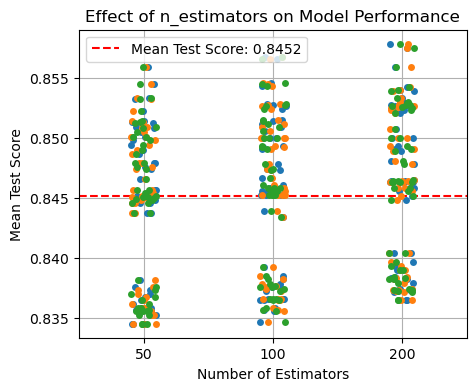

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))

# Plot the existing lines
for key, grp in results_df.groupby('param_n_estimators'):
   sns.stripplot(x="param_n_estimators", y="mean_test_score", data=results_df, jitter=True)

# Add the mean test score as a horizontal line
plt.axhline(y=mean_score, color='red', linestyle='--', label=f"Mean Test Score: {mean_score:.4f}")

# Labels and title
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Test Score")
plt.title("Effect of n_estimators on Model Performance")
plt.legend()
plt.grid(True)
plt.show()


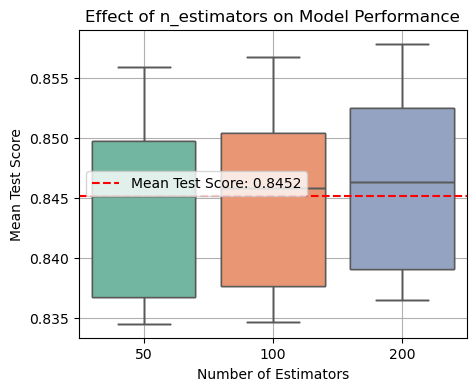

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))

# Plot the existing lines
for key, grp in results_df.groupby('param_n_estimators'):
  sns.boxplot(x="param_n_estimators", y="mean_test_score", data=results_df, palette="Set2")


# Add the mean test score as a horizontal line
plt.axhline(y=mean_score, color='red', linestyle='--', label=f"Mean Test Score: {mean_score:.4f}")

# Labels and title
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Test Score")
plt.title("Effect of n_estimators on Model Performance")
plt.legend()
plt.grid(True)
plt.show()

 **Insights from the Plot**
 - Models with 200 estimators generally have higher scores, with some reaching above 0.855.
 - The mean test score (0.8469) suggests that some models perform worse than average (below the red line), but many configurations exceed this benchmark.
 - There's some variability in performance, indicating that n_estimators alone isn't the sole deciding factor—other hyperparameters likely influence the results.

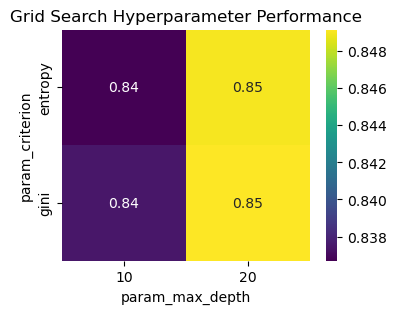

In [138]:

# Grid search for param_criterion, max_depth Hyperparameters

pivot_table = results_df.pivot_table(
    index='param_criterion',
    columns='param_max_depth',
    values='mean_test_score',
    aggfunc='mean') #This will compute the mean of mean_test_score for duplicates.

plt.figure(figsize=(4,3))
sns.heatmap(pivot_table, annot=True, cmap="viridis")
plt.title("Grid Search Hyperparameter Performance")
plt.show()

**Insights from the plot**

- max_depth = 20 and either gini or entropy (both achieve 0.85 accuracy).


In [116]:
# Manually set the best parameters
best_params = {
    'criterion': 'gini',
    'n_estimators': 200,
    'max_depth': 20,
    'min_samples_leaf': 1,
    'min_samples_split': 2
}

In [148]:
# Initialize model with manually set best parameters
final_model = RandomForestClassifier(
    criterion=best_params['criterion'],
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42  # Ensures reproducibility
)

# Fit the model on training data
final_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [150]:
 # Predict on test data
y_pred_rf = final_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Final Model Accuracy:", accuracy)

# Print a detailed classification report
print(classification_report(y_test, y_pred_rf))

Final Model Accuracy: 0.858712715855573
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1651
           1       0.84      0.88      0.86      1534

    accuracy                           0.86      3185
   macro avg       0.86      0.86      0.86      3185
weighted avg       0.86      0.86      0.86      3185



In [128]:
RF = RandomForestClassifier(criterion='gini', max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)

# Train the model
RF.fit(X_train, y_train)

# Make predictions
y_pred_rf_grid= RF.predict(X_test)

Accuracy: 0.858712715855573
Precision: 0.8374844333748444
Recall: 0.8767926988265972
ROC AUC: 0.8593533451734439


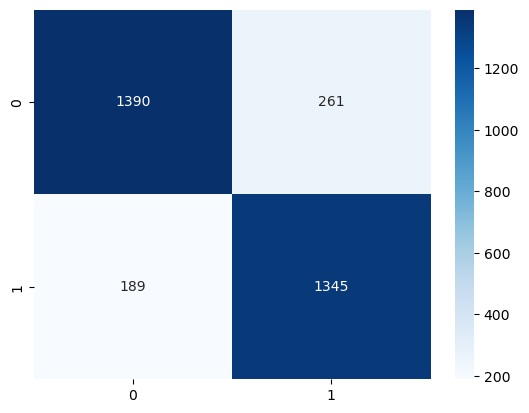

In [130]:
evaluate_model(y_test,y_pred_rf_grid)

# **DecisionTreeClassifier**

In [167]:
from sklearn.model_selection import GridSearchCV
# Define Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid_dt = {
    "criterion": ["gini", "entropy"],      # Splitting criteria
    "max_depth": [5, 10, 20, None],        # Tree depth
    "min_samples_split": [2, 5, 10],       # Minimum samples required to split
    "min_samples_leaf": [1, 2, 4],         # Minimum samples per leaf
    "max_features": ["sqrt", "log2", None] # Maximum features to consider
}

In [169]:
# Perform Grid Search with 5-fold Cross Validation
grid_search_dt = GridSearchCV(
    estimator=dt, 
    param_grid=param_grid_dt, 
    scoring='accuracy', 
    cv=5, 
    n_jobs=-1,  # Use all CPU cores
    verbose=2
)

# Fit Grid Search on training data
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters
print("Best Parameters:", grid_search_dt.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [171]:
print("Best Parameters:", grid_search_dt.best_params_)
print("Best Score:", grid_search_dt.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.8106597536178557


In [173]:
# Convert results into DataFrame
results_df_dt = pd.DataFrame(grid_search_dt.cv_results_)

# Select relevant columns and sort by mean test score
results_df_dt = results_df_dt[['param_criterion', 'param_max_features', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'mean_test_score']]
results_df_dt = results_df_dt.sort_values(by='mean_test_score', ascending=False)

print(results_df_dt.head(10))  # Show top 10 results

    param_criterion param_max_features param_max_depth  \
45             gini               None              10   
161         entropy               None              10   
160         entropy               None              10   
159         entropy               None              10   
158         entropy               None              10   
155         entropy               None              10   
157         entropy               None              10   
49             gini               None              10   
156         entropy               None              10   
46             gini               None              10   

     param_min_samples_leaf  param_min_samples_split  mean_test_score  
45                        1                        2         0.810660  
161                       4                       10         0.810267  
160                       4                        5         0.810267  
159                       4                        2         0.810267  
1

**Grid search for criterion, max_depth Hyperparameters**

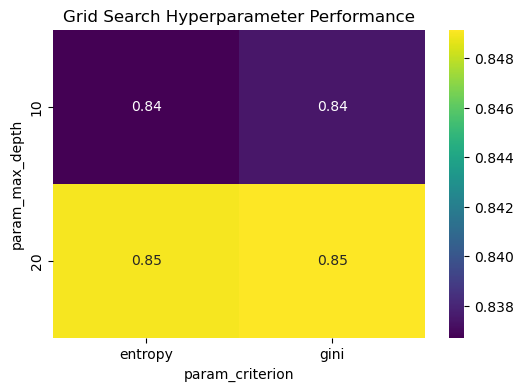

In [176]:
# Grid search for n_estimators, max_depth Hyperparameters

pivot_table = results_df.pivot_table(
    index='param_max_depth',
    columns='param_criterion',
    values='mean_test_score',
    aggfunc='mean') #This will compute the mean of mean_test_score for duplicates.

plt.figure(figsize=(6, 4))
sns.heatmap(pivot_table, annot=True, cmap="viridis")
plt.title("Grid Search Hyperparameter Performance")
plt.show()


**Grid search for min_samples_leaf, min_samples_split Hyperparameters**

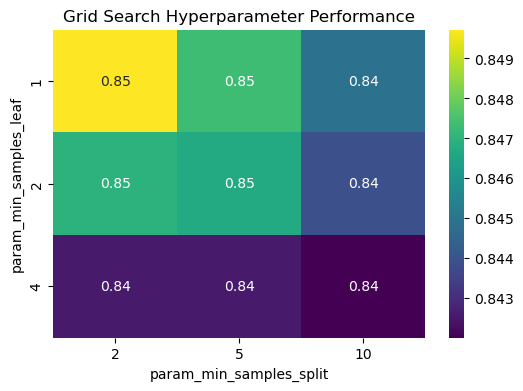

In [183]:
# Grid search for min_samples_leaf, min_samples_split Hyperparameters

pivot_table = results_df.pivot_table(
    index='param_min_samples_leaf',
    columns='param_min_samples_split',
    values='mean_test_score',
    aggfunc='mean') #This will compute the mean of mean_test_score for duplicates.

plt.figure(figsize=(6, 4))
sns.heatmap(pivot_table, annot=True, cmap="viridis")
plt.title("Grid Search Hyperparameter Performance")
plt.show()


**Insights from the plot**
 **Higher Test Scores at Lower min_samples_leaf Values:**

- When min_samples_leaf = 1, the model achieves the highest test score (0.85) for min_samples_split values of 2 and 5.

- As min_samples_leaf increases to 4, performance slightly drops to 0.84.

- This suggests that restricting leaf size too much may reduce model flexibility and performance.

**min_samples_split Impact:**

- When min_samples_split = 2 or 5, the test score is consistently 0.85 for small leaf values.

- When min_samples_split = 10, performance slightly declines (0.84), likely because higher split thresholds reduce model complexity.

**Best Hyperparameter Combination:**

- min_samples_leaf = 1 and min_samples_split = 2 or 5 yield the highest accuracy (0.85).

- This suggests that a smaller leaf size combined with a moderate split threshold is optimal.

In [275]:
# Manually set the best parameters
best_params_dt = {
    'criterion': 'entropy',
    'max_depth': 10,
    'min_samples_leaf': 1,
    'min_samples_split': 2
}

In [277]:
# Initialize model with manually set best parameters
final_model = DecisionTreeClassifier(
    criterion=best_params_dt['criterion'],
    max_depth=best_params_dt['max_depth'],
    min_samples_split=best_params_dt['min_samples_split'],
    min_samples_leaf=best_params_dt['min_samples_leaf'],
    random_state=42  # Ensures reproducibility
)

# Fit the model on training data
final_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [279]:
 # Predict on test data
y_pred_dt = final_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print("Final Model Accuracy:", accuracy)

# Print a detailed classification report
print(classification_report(y_test, y_pred_dt))

Final Model Accuracy: 0.8232339089481947
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1651
           1       0.79      0.87      0.83      1534

    accuracy                           0.82      3185
   macro avg       0.83      0.82      0.82      3185
weighted avg       0.83      0.82      0.82      3185



In [291]:

dt = DecisionTreeClassifier(criterion= "entropy",max_depth =10 ,max_features=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt_grid = dt.predict(X_test)

Accuracy: 0.8232339089481947
Precision: 0.7874481941977501
Recall: 0.8670143415906127
ROC AUC: 0.8247851841205638


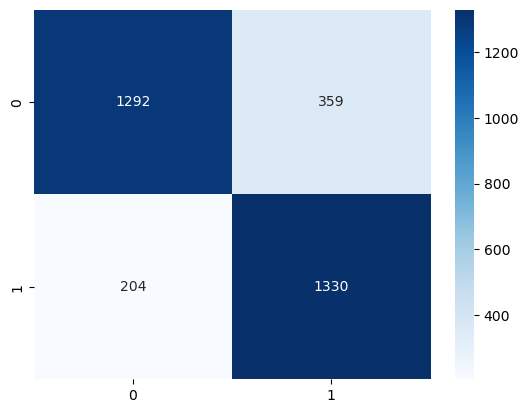

In [293]:
#Evaluate the model
evaluate_model(y_test,y_pred_dt_grid)

# **Logistic Regression**

In [201]:
# Define Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Define hyperparameter grid for tuning
param_grid_lr = {
    "C": [0.01, 0.1, 1, 10, 100],           # Regularization strength
    "penalty": ["l1", "l2", "elasticnet", None],  # Regularization type
    "solver": ["liblinear", "saga"]         # Optimization solvers
}

In [203]:
# Perform Grid Search with 5-fold Cross Validation
grid_search_lr = GridSearchCV(
    estimator=log_reg, 
    param_grid=param_grid_lr, 
    scoring='accuracy', 
    cv=5, 
    n_jobs=-1,  # Use all CPU cores
    verbose=2
)

# Fit Grid Search on training data
grid_search_lr.fit(X_train, y_train)

# Get the best hyperparameters
print("Best Parameters:", grid_search_lr.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [205]:
print("Best Parameters:", grid_search_lr.best_params_)
print("Best Score:", grid_search_lr.best_score_)

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.771882055350001


In [211]:
# Convert results into DataFrame
results_df_lr = pd.DataFrame(grid_search_lr.cv_results_)

# Select relevant columns and sort by mean test score
results_df_lr = results_df_lr[['param_C', 'param_penalty', 'param_solver', 'mean_test_score']]
results_df_lr = results_df_lr.sort_values(by='mean_test_score', ascending=False)

print(results_df_lr.head(10))  # Show top 10 results

    param_C param_penalty param_solver  mean_test_score
8      0.10            l1    liblinear         0.771882
16     1.00            l1    liblinear         0.771725
24    10.00            l1    liblinear         0.771646
32   100.00            l1    liblinear         0.771568
0      0.01            l1    liblinear         0.771097
10     0.10            l2    liblinear         0.708687
2      0.01            l2    liblinear         0.701625
26    10.00            l2    liblinear         0.697465
34   100.00            l2    liblinear         0.690008
18     1.00            l2    liblinear         0.684512


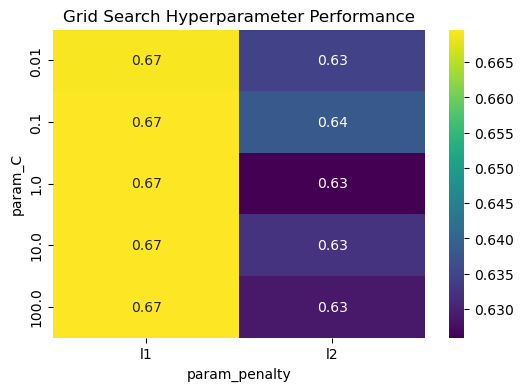

In [215]:
# Grid search for C, penalty Hyperparameters

pivot_table = results_df_lr.pivot_table(
    index='param_C',
    columns='param_penalty',
    values='mean_test_score',
    aggfunc='mean') #This will compute the mean of mean_test_score for duplicates.

plt.figure(figsize=(6, 4))
sns.heatmap(pivot_table, annot=True, cmap="viridis")
plt.title("Grid Search Hyperparameter Performance")
plt.show()


**Key Observations:**
- L1 Penalty Performs Better
- Across all values of C, the L1 penalty consistently achieves a test score of 0.67.
- In contrast, the L2 penalty has a lower performance, with scores ranging from 0.63 to 0.64.
- Regularization Strength (C) Has Minimal Effect
- For L1 penalty, changing C from 0.01 to 100.0 doesn't impact the score (remains at 0.67).
- For L2 penalty, performance is slightly better at C = 0.1 (0.64) but remains lower than L1.

**Best Hyperparameter Combination**
- The best performing combination is:
- param_penalty = L1
- param_C = Any value (since performance is constant at 0.67)


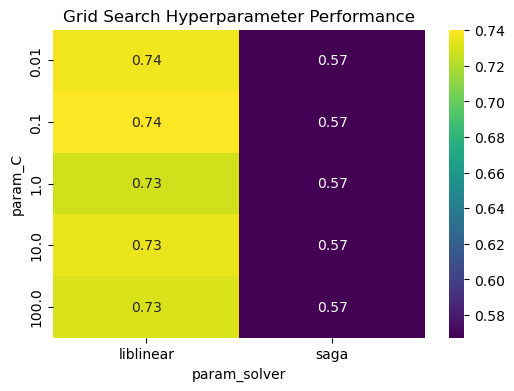

In [217]:
# Grid search for C, solver Hyperparameters

pivot_table = results_df_lr.pivot_table(
    index='param_C',
    columns='param_solver',
    values='mean_test_score',
    aggfunc='mean') #This will compute the mean of mean_test_score for duplicates.

plt.figure(figsize=(6, 4))
sns.heatmap(pivot_table, annot=True, cmap="viridis")
plt.title("Grid Search Hyperparameter Performance")
plt.show()


**Key Observations:**
- liblinear Significantly Outperforms saga
- With liblinear, the best score is 0.74, which remains consistent for C = 0.01 and 0.1.
- With saga, the performance is much lower at 0.57, regardless of C.
- Regularization Strength (C) Has Minimal Effect
- For liblinear, performance is highest (0.74) at C = 0.01 and 0.1.
- As C increases (stronger regularization), the score slightly drops to 0.73.

**Best Hyperparameter Combination**
- Solver: liblinear
- C value: 0.01 or 0.1


In [299]:
# Manually set the best parameters
best_params_lr = {
    'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'
}

In [301]:
# Initialize model with manually set best parameters
final_model = LogisticRegression(
    C=best_params_lr['C'],
    penalty=best_params_lr['penalty'],
    solver=best_params_lr['solver'],
    random_state=42  # Ensures reproducibility
)

# Fit the model on training data
final_model.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')

In [303]:
 # Predict on test data
y_pred_lr = final_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print("Final Model Accuracy:", accuracy)

# Print a detailed classification report
print(classification_report(y_test, y_pred_lr))

Final Model Accuracy: 0.7686028257456828
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1651
           1       0.74      0.79      0.77      1534

    accuracy                           0.77      3185
   macro avg       0.77      0.77      0.77      3185
weighted avg       0.77      0.77      0.77      3185



In [295]:
LR= LogisticRegression(C=0.1, penalty = 'l1', solver='liblinear')

# Train the model
LR.fit(X_train, y_train)

# Make predictions
y_pred_LR_grid = LR.predict(X_test)

Accuracy: 0.7682888540031397
Precision: 0.7435740514075887
Recall: 0.7920469361147328
ROC AUC: 0.7691306758102434


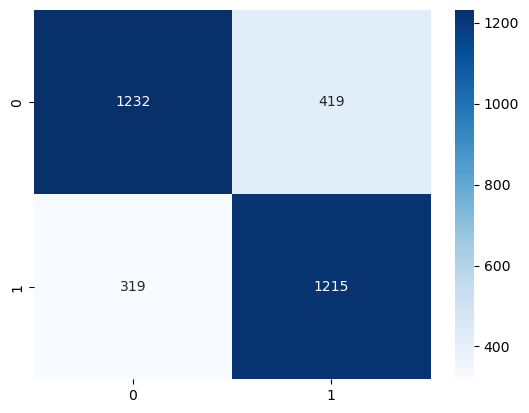

In [297]:
evaluate_model(y_test,y_pred_LR_grid)

# **Conclusion**

**Accuracy**
 - RandomForestClassifier-**85%**
 - DecisionTreeClassifier-**82%**
 - LogisticRegression-**76%**